# 🛍️ Retail Sales Analysis
## 🎯 Objective
This analysis aims to extract insights from sales data to support business decisions in the areas of:
- Inventory management
- Customer satisfaction
- Revenue optimization

## 🗃️ Dataset Overview
The dataset used in this analysis was sourced from [📂 *Retail Sales Dataset on Kaggle*](https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset). It contains transactional records from a retail store, capturing both customer and sales-related details. The main features include:


-  Transaction ID : Unique identifier for each transaction
- Date : The date of purchase
- Customer ID : Unique identifier for each customer
- Gender : Gender of the customer
- Age : Customer's Age
- Product Category : Type of Product Purchased
- Quantity : Number of units bought
- Price Per Unit : Price of a single unit of the product
- Total Amount : Total amount paid for the transaction (Quantity x Price per unit)

We aim to understand trends, behaviors, and patterns within this data.

## ❓ Key Business Questions

1. What is the Gender distribution of customers
2. Which product categories generate the most revenue?
3. How do Sales trends change across different months of the year?
4. Which age group spends the most on retail products?
5. Relationship between Product Price and Quantity sold




📦 **Import Libraries**

In this step, we will import all necessary libraries required for data analysis and visualization, such as pandas, numpy, matplotlib, seaborn, etc.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

🧾 **Load and Preview Dataset**

In this step, we will load the dataset into a pandas DataFrame and preview the first few rows to understand its structure and contents.


In [2]:
df=pd.read_csv(r"C:\Users\joshua\Documents\Data Analytics and Machine Learning Project\Retail prices EDA\retail_sales_dataset.csv")
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
def data_overview(df):
    """ 
    Function to provide an overview of the dataset.
    It prints the first few rows, a description of the data, data types, missing values,
    shape of the data, columns, and index.
    """
    print("Data overview:")
    print(df.head())

    """_summary_
    """
    print("\nDescriptive statistics:")
    print(df.describe())

    """
    Data Information
    """
    print("\nData types:")
    print(df.info())

     
    """
    Missing Values
    """
    print("\nMissing Values:")
    print(df.isna().sum())

    """
    Duplicate
    """
    print("\nDuplicates:")
    print(df.duplicated().sum())
    

    """_summary_
    """
    print("\nData Shape:")
    print(df.shape)

    """
    Data Columns
    """
    print("\nData Columns:")
    print(df.columns.tolist())
    
data_overview(df)


Data overview:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  

Descriptive statistics:
       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288

In [4]:
df['Product Category'].unique()

array(['Beauty', 'Clothing', 'Electronics'], dtype=object)

In [5]:
df['Price per Unit'].unique()

array([ 50, 500,  30,  25, 300], dtype=int64)

In [6]:
df['Age'].unique()

array([34, 26, 50, 37, 30, 45, 46, 63, 52, 23, 35, 22, 64, 42, 19, 27, 47,
       62, 18, 49, 28, 38, 43, 39, 44, 51, 58, 48, 55, 20, 40, 54, 36, 31,
       21, 57, 25, 56, 29, 61, 32, 41, 59, 60, 33, 53, 24], dtype=int64)

🧹  **Data Cleaning and Preprocessing**

In [7]:
# converting the Date column from object to datetime datatype

df['Date']=pd.to_datetime(df['Date'], errors='coerce')

*Age Grouping*

In [9]:
bins =[15, 22, 30, 40, 55, 65]
labels=['Students (16-22)', 'Young Professionals (23-30)', 'Settled Adults (31-40)', 'Mature Adults (41-55)', 'Seniors (56-65)']
df['Age_Group']=pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [10]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age_Group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Settled Adults (31-40)
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Young Professionals (23-30)
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Mature Adults (41-55)
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Settled Adults (31-40)
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Settled Adults (31-40)


In [11]:
# dropping irrelevant columns
df.drop(['Transaction ID', 'Age'], axis=1, inplace=True)

In [12]:
df.head()

,Date,Customer ID,Gender,Product Category,Quantity,Price per Unit,Total Amount,Age_Group
0,2023-11-24,CUST001,Male,Beauty,3,50,150,Settled Adults (31-40)
1,2023-02-27,CUST002,Female,Clothing,2,500,1000,Young Professionals (23-30)
2,2023-01-13,CUST003,Male,Electronics,1,30,30,Mature Adults (41-55)
3,2023-05-21,CUST004,Male,Clothing,1,500,500,Settled Adults (31-40)
4,2023-05-06,CUST005,Male,Beauty,2,50,100,Settled Adults (31-40)


*Extract year, month and day*

In [13]:
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day
df['Weekday'] = df['Date'].dt.day_name()

In [14]:
df.head(2)

,Date,Customer ID,Gender,Product Category,Quantity,Price per Unit,Total Amount,Age_Group,Year,Month,Day,Weekday
0,2023-11-24,CUST001,Male,Beauty,3,50,150,Settled Adults (31-40),2023,11,24,Friday
1,2023-02-27,CUST002,Female,Clothing,2,500,1000,Young Professionals (23-30),2023,2,27,Monday


### 📊  Exploratory Data Analysis (EDA)

👫 **1. What is the gender distribution of customers?**


In [15]:
sns.set(style='darkgrid')

📂 Save Plot Function – Organized Export of Visualizations

In [16]:
import os
def save_plot(filename, folder='Retail sales plot', dpi=300):
    """
    Saves the current plot to a specified folder with the given filename.
    Creates the folder if it doesn't exist.
    
    Parameters:
    - filename (str): Name of the file (e.g., 'gender_distribution.png')
    - folder (str): Folder to save the plot in (default: 'Retail sales plot')
    - dpi (int): Resolution of the image (default: 300)
    """
    if not os.path.exists(folder):
        os.makedirs(folder)
    full_path = os.path.join(folder, filename)
    plt.savefig(full_path, dpi=dpi, bbox_inches='tight')
    print(f"Plot saved to: {full_path}")


Plot saved to: Retail sales plot\Gender Distribution of Customers.png


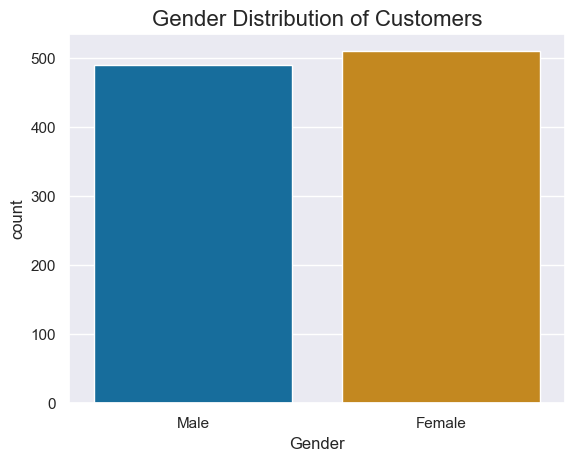

In [17]:
sns.countplot(x='Gender', data=df, palette='colorblind')
plt.title('Gender Distribution of Customers', fontsize=16)
save_plot('Gender Distribution of Customers.png')
plt.show()

 👩‍🦰👨 **Insight on Gender Distribution of Customers**

The number of male and female customers is almost the same, with **females making up 51%** and **males making up 49%**. This even split shows that the business reaches both genders equally, highlighting the need to create marketing and products that appeal to both men and women

 💰 **2. Which product categories generate the most revenue?**


Plot saved to: Retail sales plot\Total Revenue by Product Category


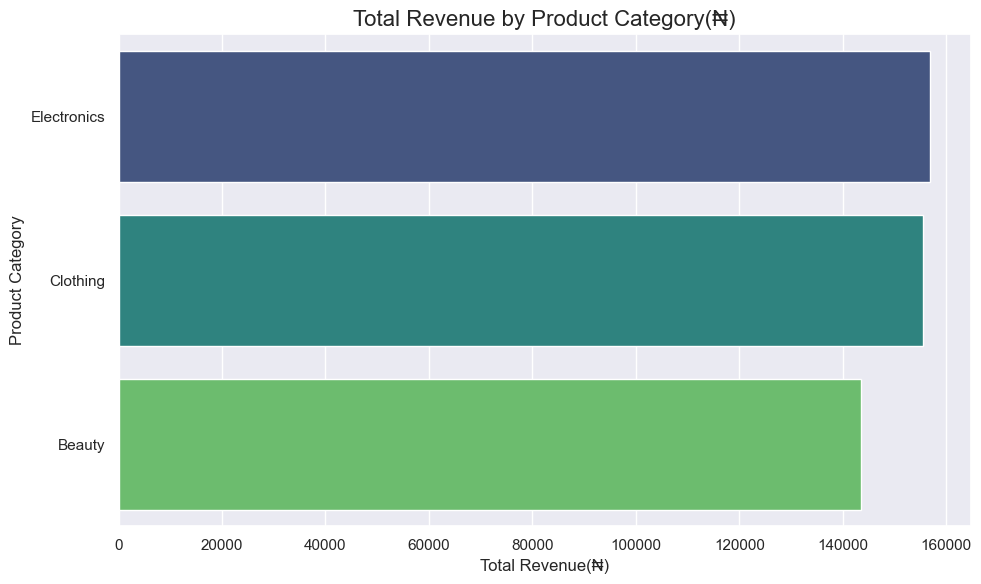

In [22]:
def plot_total_revenue_by_category(df):
    """
    Groups the dataset by product category, calculates total revenue per category, 
    sorts them in descending order, and visualizes the total revenue using a bar plot.
    """
    # Calculate total revenue per product category
    df['Revenue'] = df['Total Amount']
    revenue_by_category = df.groupby('Product Category')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False)

    # Create a bar plot for total revenue by product category
    plt.figure(figsize=(10, 6))
    sns.barplot(data=revenue_by_category,
                x='Revenue',
                y='Product Category',
                palette='viridis')

    plt.title('Total Revenue by Product Category(₦)', fontsize=16)
    plt.xlabel('Total Revenue(₦)', fontsize=12)
    plt.ylabel('Product Category', fontsize=12)
    plt.tight_layout()

    # Save the plot
    save_plot('Total Revenue by Product Category')

    # Display the plot
    plt.show()
plot_total_revenue_by_category(df)

 💸  **Insight on Product Revenue Distribution**

The bar plot reveals that **Electronics** and **Clothing** are the top-performing product categories, followed closely by **Beauty**. This implies that the business sees the most revenue from these categories. Future strategies should consider increasing focus on these high-revenue categories so as to optimize sales and inventory management.

📅 **3. How do Sales trends change across different months of the year?**

Plot saved to: Retail sales plot\Monthly Sales Trend


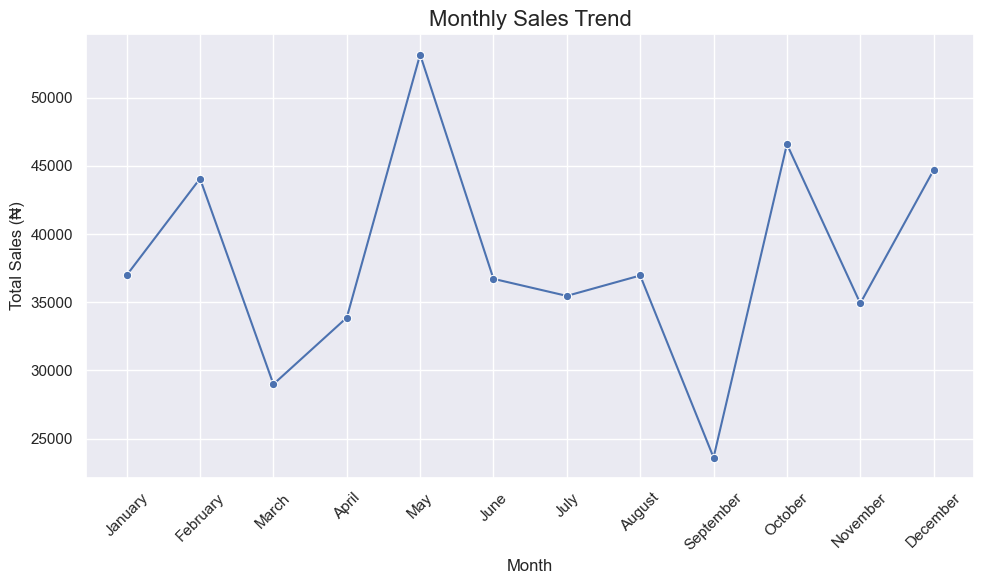

In [37]:
def plot_monthly_sales_trend(df):
    """
    Groups the dataset by month, calculates total sales per month, 
    sorts them in calendar order, and visualizes the sales trend using a line plot.
    """
    df['Month_Name'] = df['Date'].dt.strftime('%B')
    sales_by_month = df.groupby(['Month', 'Month_Name'])['Total Amount'].sum().reset_index().sort_values(by='Month')

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=sales_by_month, x='Month_Name', y='Total Amount', marker='o', sort=False)

    plt.title('Monthly Sales Trend', fontsize=16)
    plt.xlabel('Month')
    plt.ylabel('Total Sales (₦)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    save_plot('Monthly Sales Trend')
    plt.show()
plot_monthly_sales_trend(df)

📈 **Insight on Monthly Sales Trend**

The line chart shows noticeable changes from month to month. Sales peak in **May**, making it the highest performing month, while **September** records the lowest. Other months like **February**, **October**, and **December** also show strong sales, suggesting possible seasonal influences or promotional events. The trend reflects non-uniform sales distribution, emphasizing the importance of understanding seasonal demand to optimize marketing and inventory strategies.

💳**4. Which age group spends the most on retail products?**

Plot saved to: Retail sales plot\Total Spending by Age Group


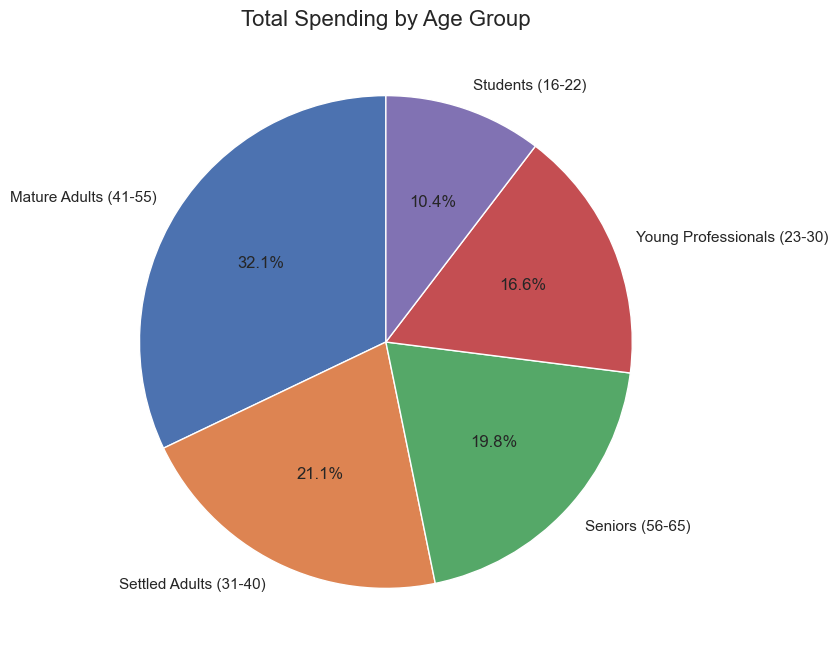

In [36]:
age_spending=df.groupby('Age_Group')['Total Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 8))
plt.pie(age_spending, labels=age_spending.index, autopct='%1.1f%%', startangle=90)
plt.title('Total Spending by Age Group', fontsize=16)
save_plot('Total Spending by Age Group')
plt.show()

💸 **Insight on Total Spending by Age Group**

 **Mature Adults (41–55)** are the highest spenders on retail products, contributing 32.1% of the total spending, followed by **Settled Adults (31–40)** and **Seniors (56–65)**.

💵📈 **5.Relationship between Product Price and Quantity sold**

In [34]:
correlation=df[['Price per Unit', 'Quantity']].corr().round(2)
print("Correlation between price and quantity sold:")
ddf=pd.DataFrame(correlation)
ddf



Correlation between price and quantity sold:


,Price per Unit,Quantity
Price per Unit,1.00,0.02
Quantity,0.02,1.00


Plot saved to: Retail sales plot\Relationship between Product Price and Quantity Sold


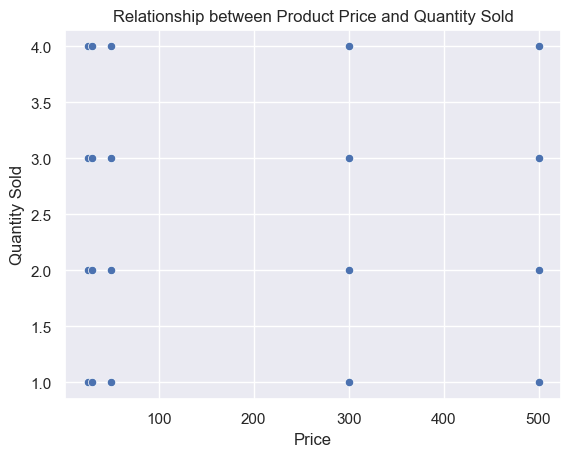

In [35]:
sns.scatterplot(x='Price per Unit', y='Quantity', data=df)
plt.title('Relationship between Product Price and Quantity Sold')
plt.xlabel('Price')
plt.ylabel('Quantity Sold')
save_plot('Relationship between Product Price and Quantity Sold')
plt.show()

🧮📦 **Insight on Relationship between Product price and Quantity Sold**

There is no clear relationship between product price and quantity sold. Changes in price don’t appear to influence how much people buy.

📝 **NB:** Other potential factors that could influence quantity sold were not explored in order to keep the analysis concise and focused.


## Summary of Key Insights and Recommendations 📊💼

1. **Gender Distribution is Balanced 👩👨**  
   - **Insight**: Female customers make up 51% and males 49%.  
   - **Implication**: The business appeals equally to both genders.  
   - **Recommendation**: Maintain gender-neutral communication and product strategies to continue engaging both male and female customers effectively.

2. **Limited Product Range, Strong Performance 📦**  
   - **Insight**: Only Electronics, Clothing, and Beauty are sold, and all three perform well.  
   - **Implication**: Sales are driven entirely by these categories, showing strong customer interest.  
   - **Recommendation**: Improve promotion, stock levels, and customer service in these categories before considering expansion.

3. **Seasonal Sales Trends 📈📉**  
   - **Insight**: Sales peak in May, with strong performance in Feb, Oct, and Dec. September has the lowest sales.  
   - **Implication**: Sales patterns are seasonal, likely influenced by promotions, holidays, or consumer behavior.  
   - **Recommendation**: Plan marketing campaigns and inventory around peak periods and investigate why September underperforms.

4. **High-Spending Age Groups 🎯**  
   - **Insight**: Mature Adults (41–55) and Settled Adults (31–40) account for the largest share of spending.  
   - **Implication**: These customers are key to business revenue.  
   - **Recommendation**: Target them with age-relevant promotions, product recommendations, and loyalty offers.

5. **Weak Relationship Between Price and Quantity Sold 💸**  
   - **Insight**: No clear link between product price and how much people buy.  
   - **Implication**: Customers are not highly price-sensitive.  
   - **Recommendation**: Shift focus from price adjustments to improving product quality, branding, and the shopping experience.
